# Part 3: PCA
 **_TABLE OF CONTENT_**
     0. General Functions
     1. AAPL
        1.1 PCA
        1.2 MLP
        1.3 SVM
        1.4 LR
     2. AMZN
     3. GOOG
     4. FB
     5. NFLX

In [29]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
from sklearn import metrics, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from preprocessing import create_basetable
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from helpFunctions import *

## 0. GENERAL FUNCTIONS

Initialize some variables for later use throughout notebook

Time window according to 70-30 split

In [30]:
start_independent = date(2020, 3, 22)
end_independent= date(2020, 11, 30)
start_dependent = date(2020, 12, 1)

Function that creates a random Forest classifier given a training and test set

In [31]:
def mlpClassifier(scaled_train_X, scaled_test_X, train_y, test_y):
    mlp = MLPClassifier(random_state=123)
    mlp.fit(scaled_train_X, train_y)
    pred = mlp.predict(scaled_test_X)
    evaluate_model(pred, test_y)

In [32]:
def svmClassifier(pca_train_X, train_y, pca_test_X, test_y):
    svc_classifier = SVC(random_state= 123, verbose=1)
    svc_classifier.fit(pca_train_X, train_y)
    pred = svc_classifier.predict(pca_test_X)
    evaluate_model(pred, test_y)

In [33]:
def lrClassifier(scaled_train_X, scaled_test_X, train_y, test_y):
    lr = LogisticRegression(verbose = 1, random_state= 123, solver= 'liblinear')
    lr.fit(scaled_train_X, train_y)
    pred = lr.predict(scaled_test_X)
    evaluate_model(pred, test_y)


### 1. Apple
#### 1.1 Data Retrieval and PCA
Retrieve the training and test set for APPLE stock

In [34]:
%%time
tck = 'AAPL'
# Retrieved scaled
# train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck,
                                                                  start_independent= start_independent,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 39.2 s


Show the initial shape of the training set:
In total 61 features included

In [35]:
scaled_train_X.shape

(152, 76)

Check the balance in training set of observations per category

In [36]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  63
Number of buy observations :  89

--------Test set--------
Total number of observations:  72
Number of sell observations :  40
Number of buy observations :  32


Employ PCA to reduce the dimensionality of the feature space
We want to keep at least 95% of variance

In [37]:
%%time
pca = PCA(n_components= 0.95)
pca.fit(scaled_train_X)
pca_train_X = pca.transform(scaled_train_X)
pca_test_X = pca.transform(scaled_test_X)

Wall time: 15.6 ms


Visualize cumulative variance

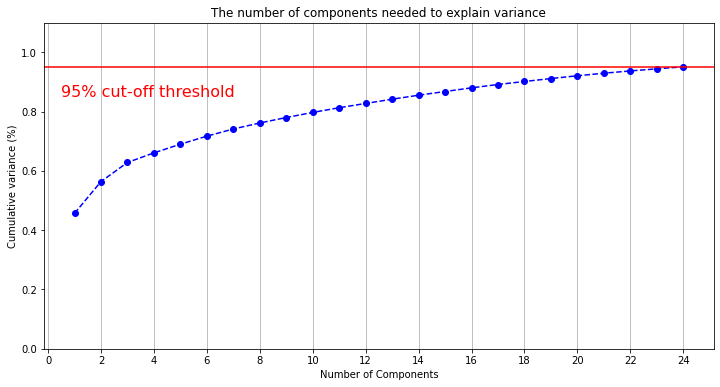

In [38]:
plot_pca(pca, pca_train_X)

Inspect the dimensionality after PCA
Number of features has reduced drastically

In [39]:
pca_train_X.shape

(152, 24)

#### 1.2 MLP

AUC: 0.446875
              precision    recall  f1-score   support

           0       0.51      0.55      0.53        40
           1       0.38      0.34      0.36        32

    accuracy                           0.46        72
   macro avg       0.45      0.45      0.45        72
weighted avg       0.45      0.46      0.45        72



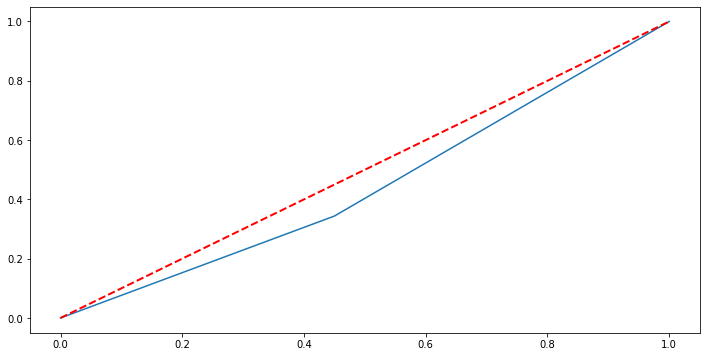

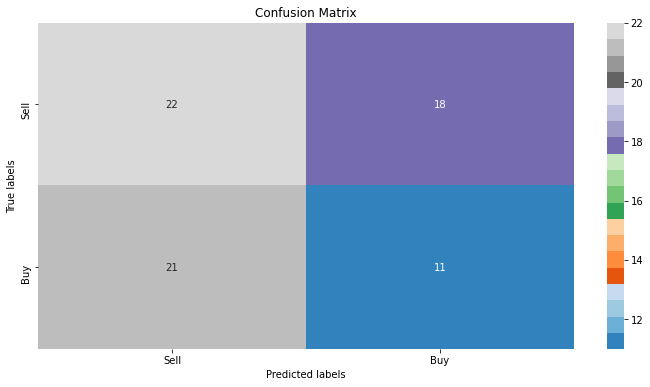

In [40]:
mlpClassifier(pca_train_X,pca_test_X, train_y, test_y)

#### 1.3 SVM

[LibSVM]AUC: 0.515625
              precision    recall  f1-score   support

           0       0.62      0.12      0.21        40
           1       0.45      0.91      0.60        32

    accuracy                           0.47        72
   macro avg       0.54      0.52      0.41        72
weighted avg       0.55      0.47      0.38        72



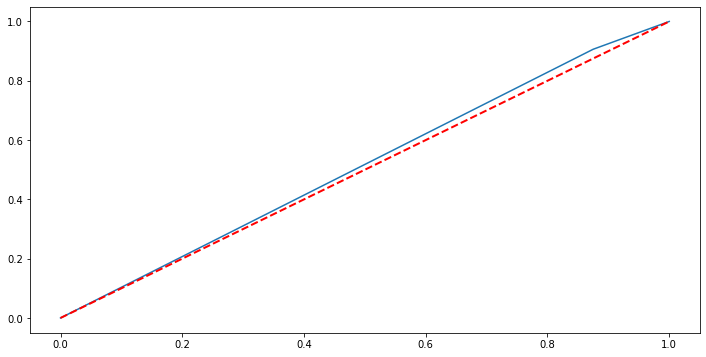

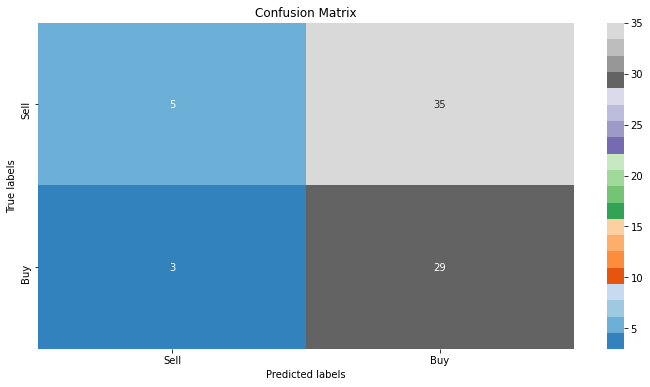

In [41]:
svmClassifier(pca_train_X, train_y, pca_test_X, test_y)

#### 1.4 LR


[LibLinear]AUC: 0.571875
              precision    recall  f1-score   support

           0       0.60      0.93      0.73        40
           1       0.70      0.22      0.33        32

    accuracy                           0.61        72
   macro avg       0.65      0.57      0.53        72
weighted avg       0.64      0.61      0.55        72



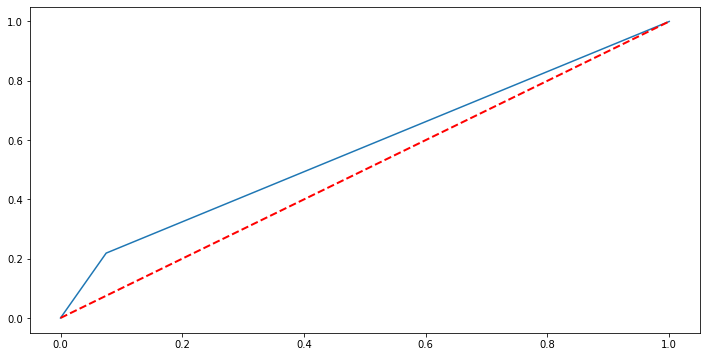

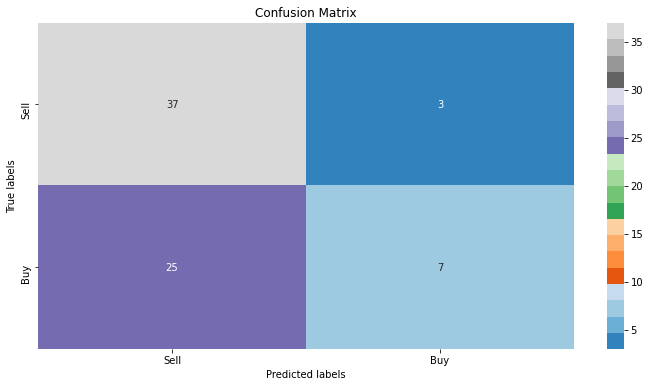

In [42]:
lrClassifier(pca_train_X,pca_test_X, train_y, test_y)

### 2. AMZN
#### 2.1 Data Retrieval and PCA

In [43]:
%%time
tck = 'AMZN'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 37 s


In [44]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  61
Number of buy observations :  91

--------Test set--------
Total number of observations:  72
Number of sell observations :  36
Number of buy observations :  36


In [45]:
%%time
pca = PCA(n_components= 0.95, random_state=123)
pca.fit(scaled_train_X)
pca_train_X = pca.transform(scaled_train_X)
pca_test_X = pca.transform(scaled_test_X)


Wall time: 12 ms


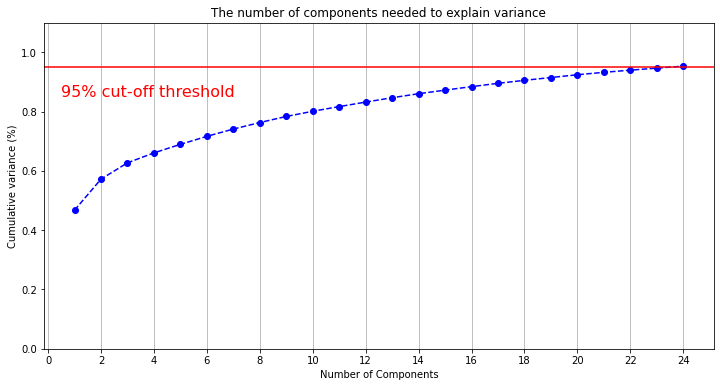

In [46]:
plot_pca(pca, pca_train_X)

#### 2.2 MLP

AUC: 0.4444444444444444
              precision    recall  f1-score   support

           0       0.45      0.56      0.50        36
           1       0.43      0.33      0.38        36

    accuracy                           0.44        72
   macro avg       0.44      0.44      0.44        72
weighted avg       0.44      0.44      0.44        72



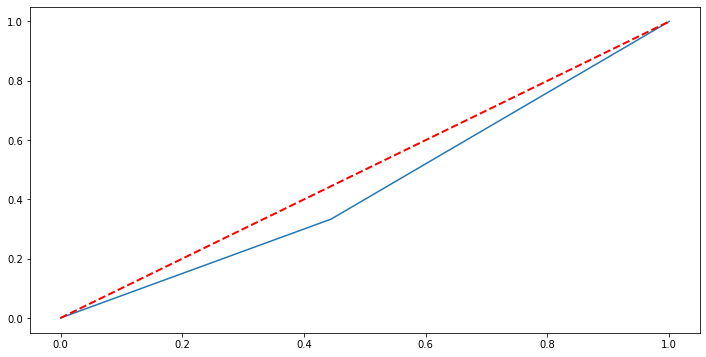

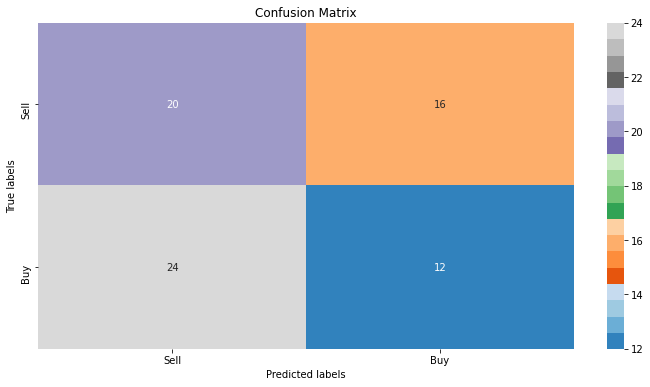

In [47]:
mlpClassifier(pca_train_X,pca_test_X, train_y, test_y)

#### 2.3 SVM

[LibSVM]AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.50      1.00      0.67        36

    accuracy                           0.50        72
   macro avg       0.25      0.50      0.33        72
weighted avg       0.25      0.50      0.33        72



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

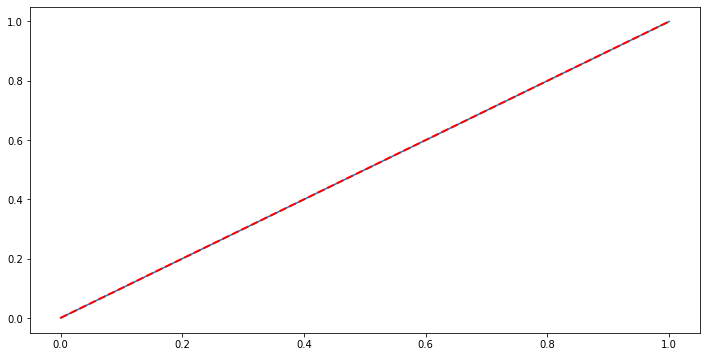

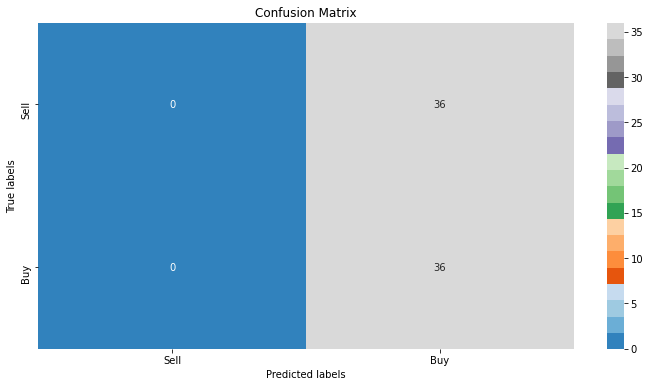

In [48]:
svmClassifier(pca_train_X, train_y, pca_test_X, test_y)

#### 2.4 LR

[LibLinear]AUC: 0.48611111111111105
              precision    recall  f1-score   support

           0       0.49      0.47      0.48        36
           1       0.49      0.50      0.49        36

    accuracy                           0.49        72
   macro avg       0.49      0.49      0.49        72
weighted avg       0.49      0.49      0.49        72



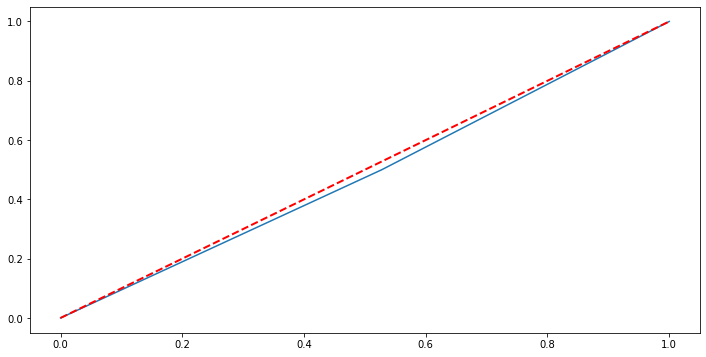

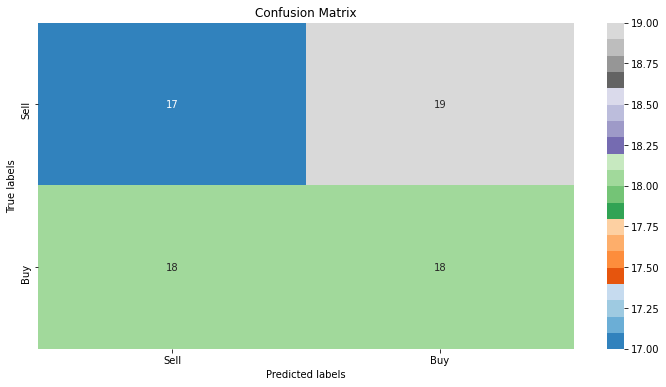

In [49]:
lrClassifier(pca_train_X,pca_test_X, train_y, test_y)

### 3. Google
#### 3.1 Data Retrieval and PCA

In [50]:
%%time
tck = 'GOOG'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 36.7 s


In [51]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  58
Number of buy observations :  94

--------Test set--------
Total number of observations:  72
Number of sell observations :  33
Number of buy observations :  39


In [52]:
%%time
pca = PCA(n_components= 0.95, random_state=123)
pca.fit(scaled_train_X)
pca_train_X = pca.transform(scaled_train_X)
pca_test_X = pca.transform(scaled_test_X)

Wall time: 11.9 ms


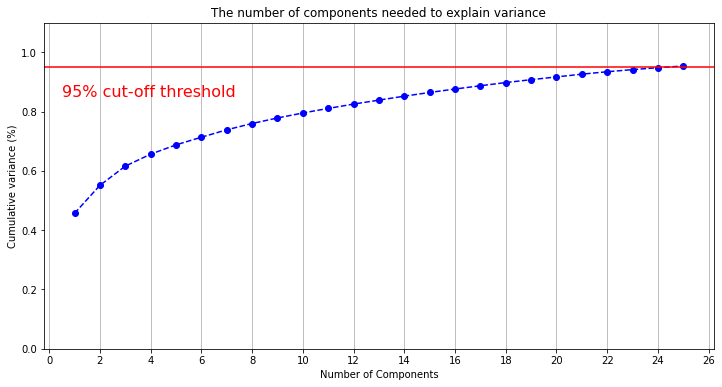

In [53]:
plot_pca(pca, pca_train_X)

#### 3.2 MLP

AUC: 0.6293706293706294
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        33
           1       0.76      0.41      0.53        39

    accuracy                           0.61        72
   macro avg       0.66      0.63      0.60        72
weighted avg       0.66      0.61      0.59        72



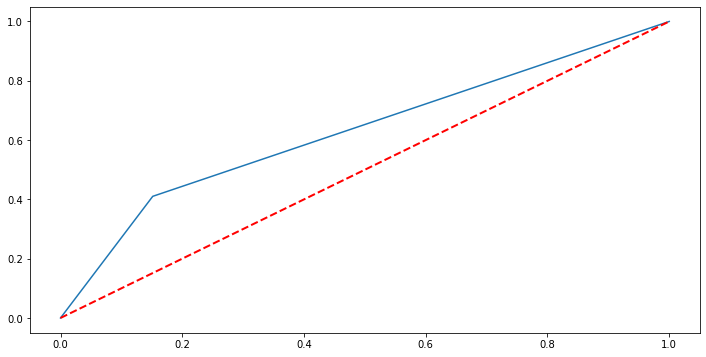

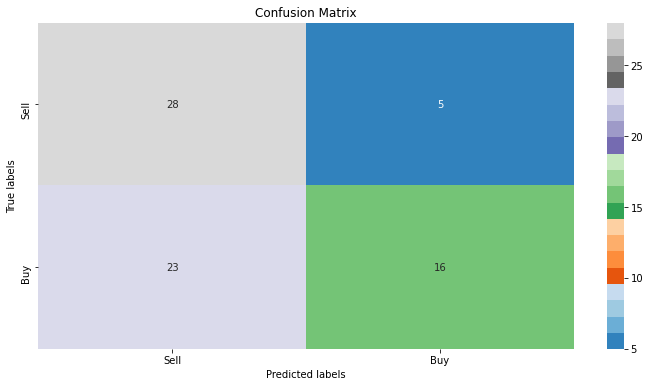

In [54]:
mlpClassifier(pca_train_X,pca_test_X, train_y, test_y)

#### 3.2 SVM

[LibSVM]AUC: 0.5303030303030303
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        33
           1       0.56      1.00      0.72        39

    accuracy                           0.57        72
   macro avg       0.78      0.53      0.41        72
weighted avg       0.76      0.57      0.44        72



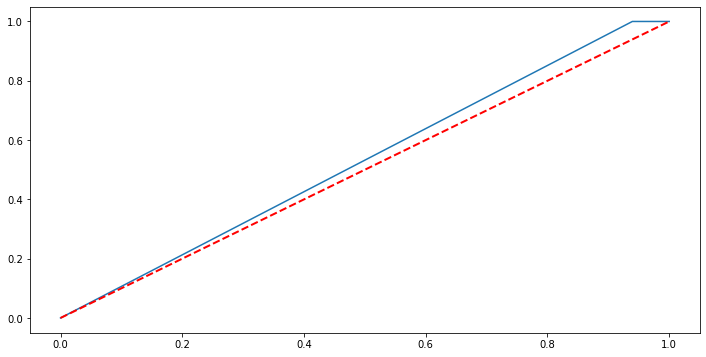

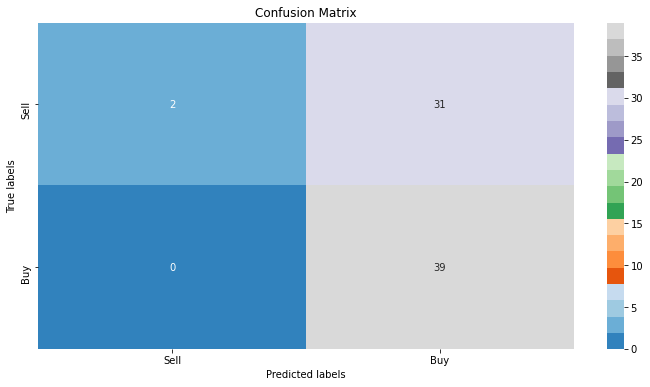

In [55]:
svmClassifier(pca_train_X, train_y, pca_test_X, test_y)

#### 3.3 LR

[LibLinear]AUC: 0.4627039627039627
              precision    recall  f1-score   support

           0       0.38      0.18      0.24        33
           1       0.52      0.74      0.61        39

    accuracy                           0.49        72
   macro avg       0.45      0.46      0.43        72
weighted avg       0.45      0.49      0.44        72



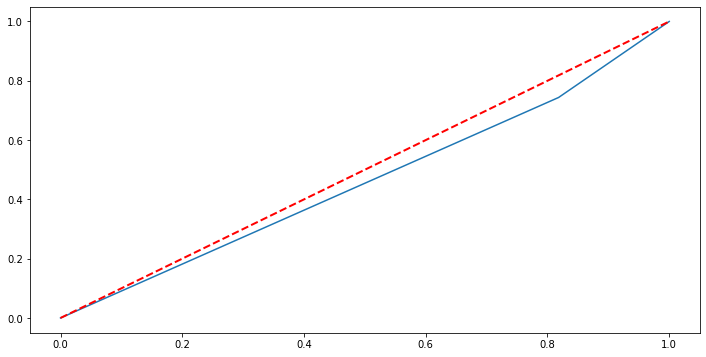

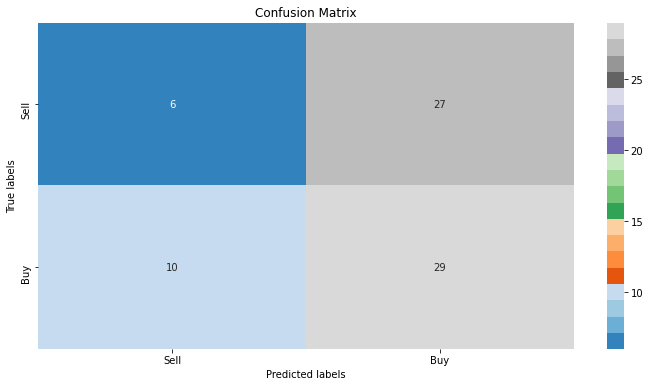

In [56]:
lrClassifier(pca_train_X,pca_test_X, train_y, test_y)

### 4. Facebook
#### 4.1 Data Retrieval and PCA

In [57]:
%%time
tck = 'FB'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 38.2 s


In [58]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  63
Number of buy observations :  89

--------Test set--------
Total number of observations:  72
Number of sell observations :  36
Number of buy observations :  36


In [59]:
%%time
pca = PCA(n_components= 0.95, random_state=123)
pca.fit(scaled_train_X)
pca_train_X = pca.transform(scaled_train_X)
pca_test_X = pca.transform(scaled_test_X)

Wall time: 17.1 ms


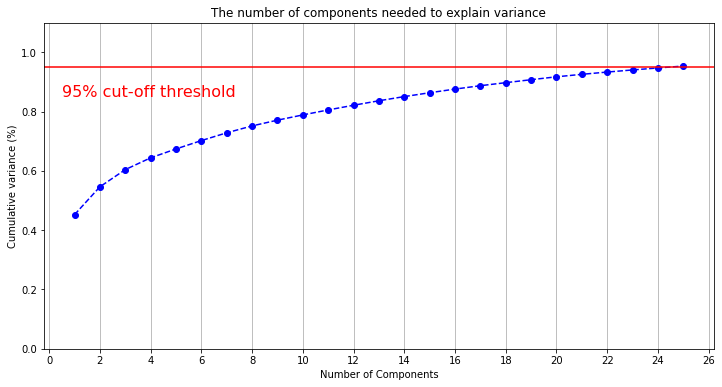

In [60]:
plot_pca(pca, pca_train_X)

#### 4.2 MLP

AUC: 0.5555555555555556
              precision    recall  f1-score   support

           0       0.53      0.92      0.67        36
           1       0.70      0.19      0.30        36

    accuracy                           0.56        72
   macro avg       0.62      0.56      0.49        72
weighted avg       0.62      0.56      0.49        72



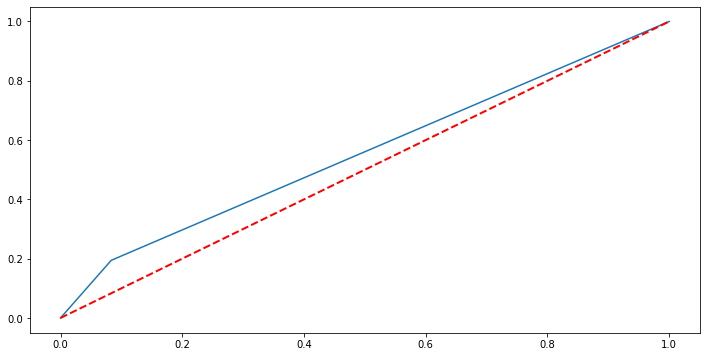

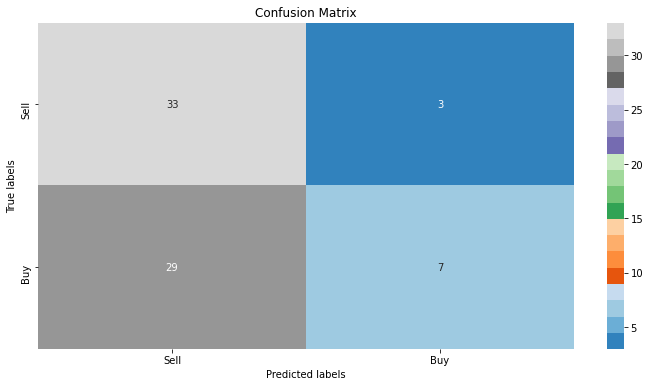

In [61]:
mlpClassifier(pca_train_X,pca_test_X, train_y, test_y)

#### 4.3 SVM

[LibSVM]AUC: 0.5138888888888888
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        36
           1       0.52      0.33      0.41        36

    accuracy                           0.51        72
   macro avg       0.52      0.51      0.50        72
weighted avg       0.52      0.51      0.50        72



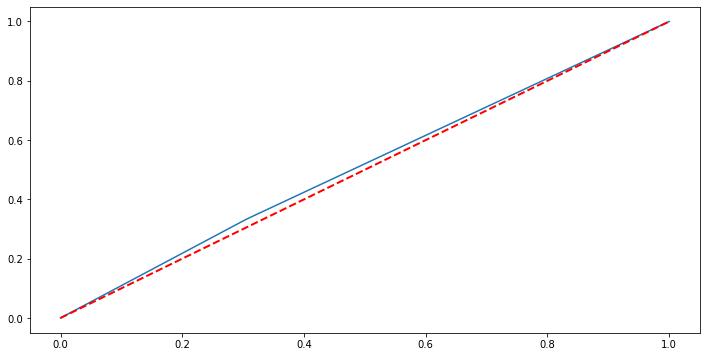

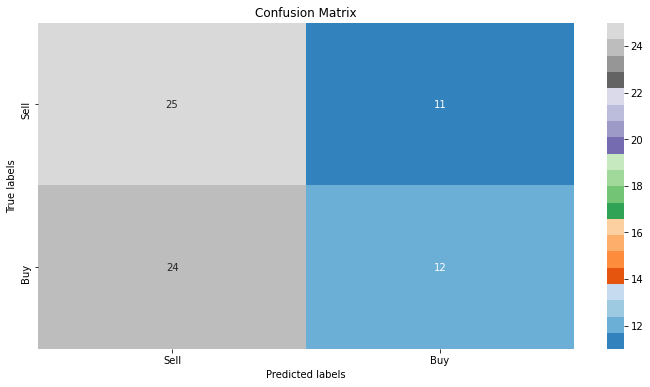

In [62]:
svmClassifier(pca_train_X, train_y, pca_test_X, test_y)

#### 4.4 LR

[LibLinear]AUC: 0.5
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        36
           1       0.50      0.25      0.33        36

    accuracy                           0.50        72
   macro avg       0.50      0.50      0.47        72
weighted avg       0.50      0.50      0.47        72



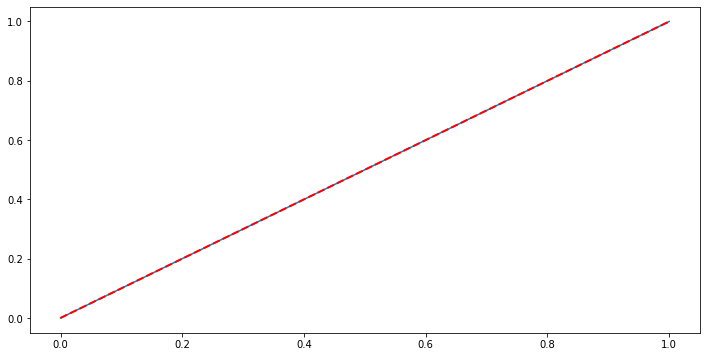

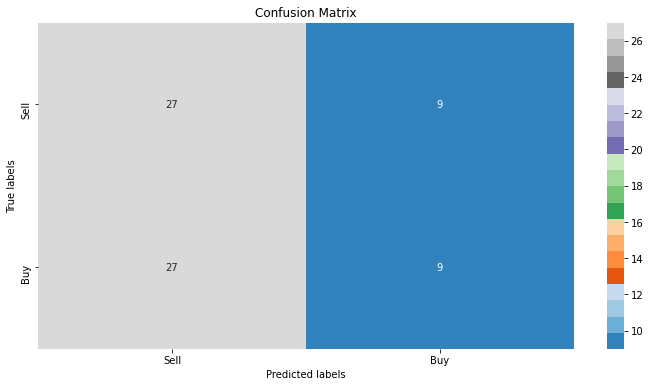

In [63]:
lrClassifier(pca_train_X,pca_test_X, train_y, test_y)

### 5. Netflix
#### 5.1 Data Retrieval and PCA

In [64]:
%%time
tck = 'NFLX'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 36.7 s


In [65]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  151
Number of sell observations :  69
Number of buy observations :  82

--------Test set--------
Total number of observations:  72
Number of sell observations :  37
Number of buy observations :  35


In [66]:
%%time
pca = PCA(n_components= 0.95, random_state=123)
pca.fit(scaled_train_X)
pca_train_X = pca.transform(scaled_train_X)
pca_test_X = pca.transform(scaled_test_X)

Wall time: 9.97 ms


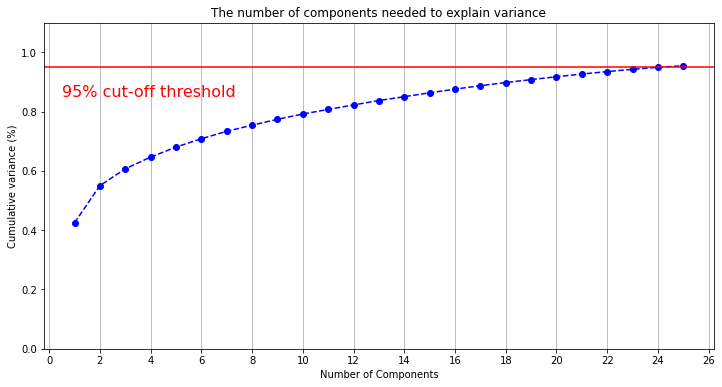

In [67]:
plot_pca(pca, pca_train_X)

#### 5.2 MLP

AUC: 0.527027027027027
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        37
           1       0.50      1.00      0.67        35

    accuracy                           0.51        72
   macro avg       0.75      0.53      0.38        72
weighted avg       0.76      0.51      0.38        72



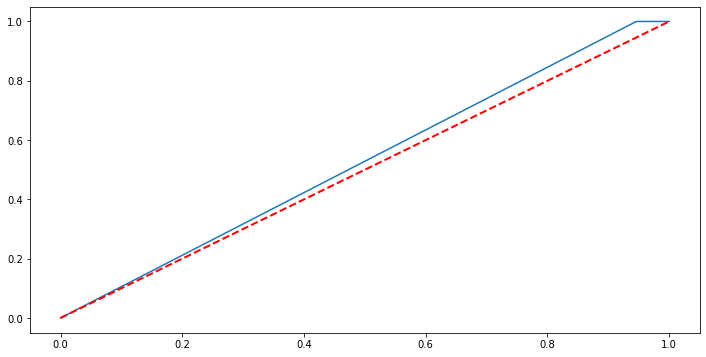

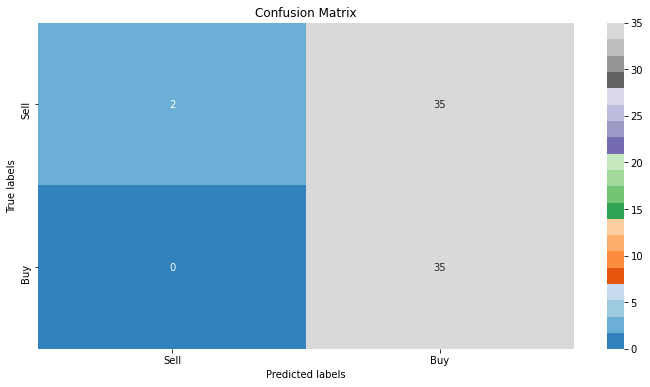

In [68]:
mlpClassifier(pca_train_X,pca_test_X, train_y, test_y)

#### 5.3 SVM

[LibSVM]AUC: 0.48416988416988416
              precision    recall  f1-score   support

           0       0.40      0.05      0.10        37
           1       0.48      0.91      0.63        35

    accuracy                           0.47        72
   macro avg       0.44      0.48      0.36        72
weighted avg       0.44      0.47      0.35        72



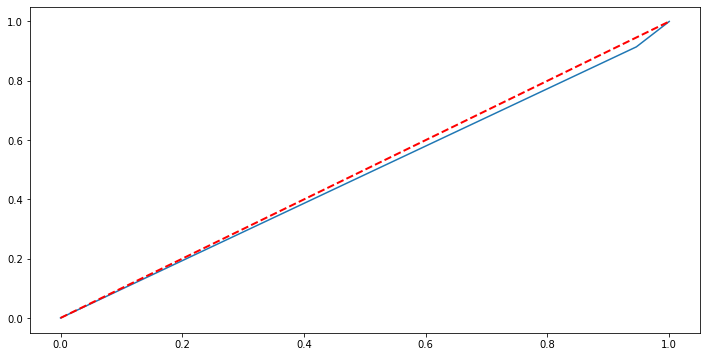

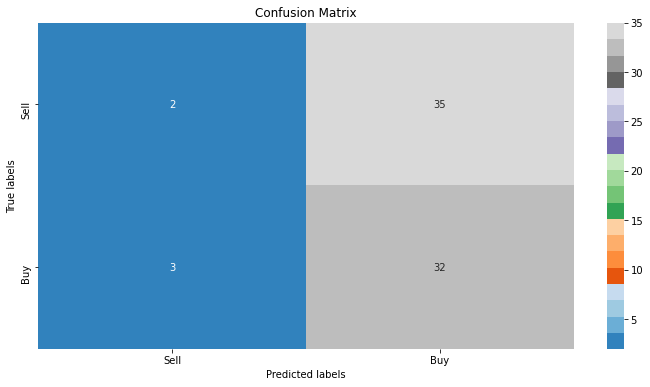

In [69]:
svmClassifier(pca_train_X, train_y, pca_test_X, test_y)

#### 5.4 LR

[LibLinear]AUC: 0.6305019305019306
              precision    recall  f1-score   support

           0       0.73      0.43      0.54        37
           1       0.58      0.83      0.68        35

    accuracy                           0.62        72
   macro avg       0.65      0.63      0.61        72
weighted avg       0.66      0.62      0.61        72



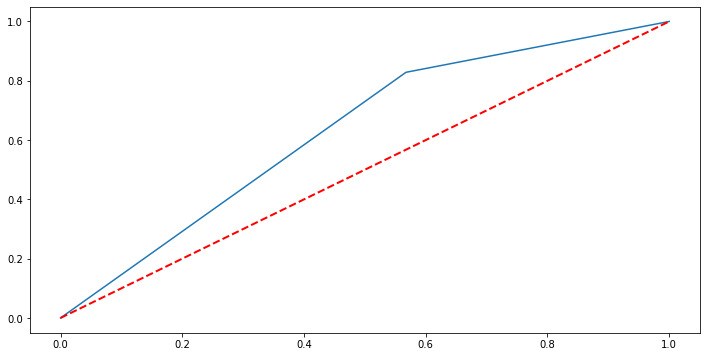

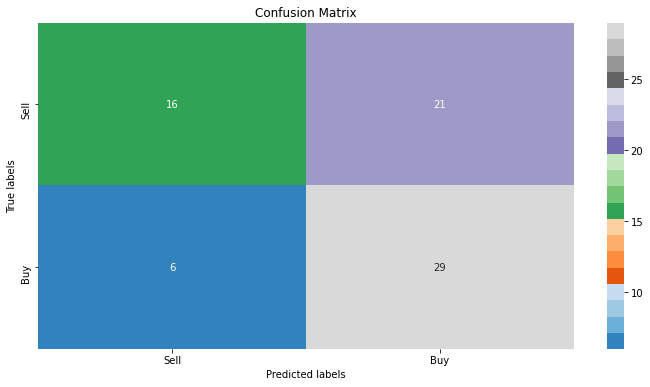

In [70]:
lrClassifier(pca_train_X,pca_test_X, train_y, test_y)
